## About Dataset


- Context <br>
"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs."

- Content <br>
The Orange Telecom's Churn Dataset, which consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription, will be used to develop predictive models. Two datasets are made available here: The churn-80 and churn-20 datasets can be downloaded.

The two sets are from the same batch, but have been split by an 80/20 ratio. As more data is often desirable for developing ML models, let's use the larger set (that is, churn-80) for training and cross-validation purposes, and the smaller set (that is, churn-20) for final testing and model performance evaluation.

- Inspiration <br>
To explore this type of models and learn more about the subject.



## Importing Dependencies

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
df = pd.read_csv('churn-bigml-80.csv')

In [88]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [90]:
df['Area code'].unique()

array([415, 408, 510], dtype=int64)

### Pandas Profiling for EDA

- Commenting for github readability

In [1]:
# from pandas_profiling import ProfileReport
# profile = ProfileReport(df)
# profile.to_notebook_iframe()

### Checking for Correlations

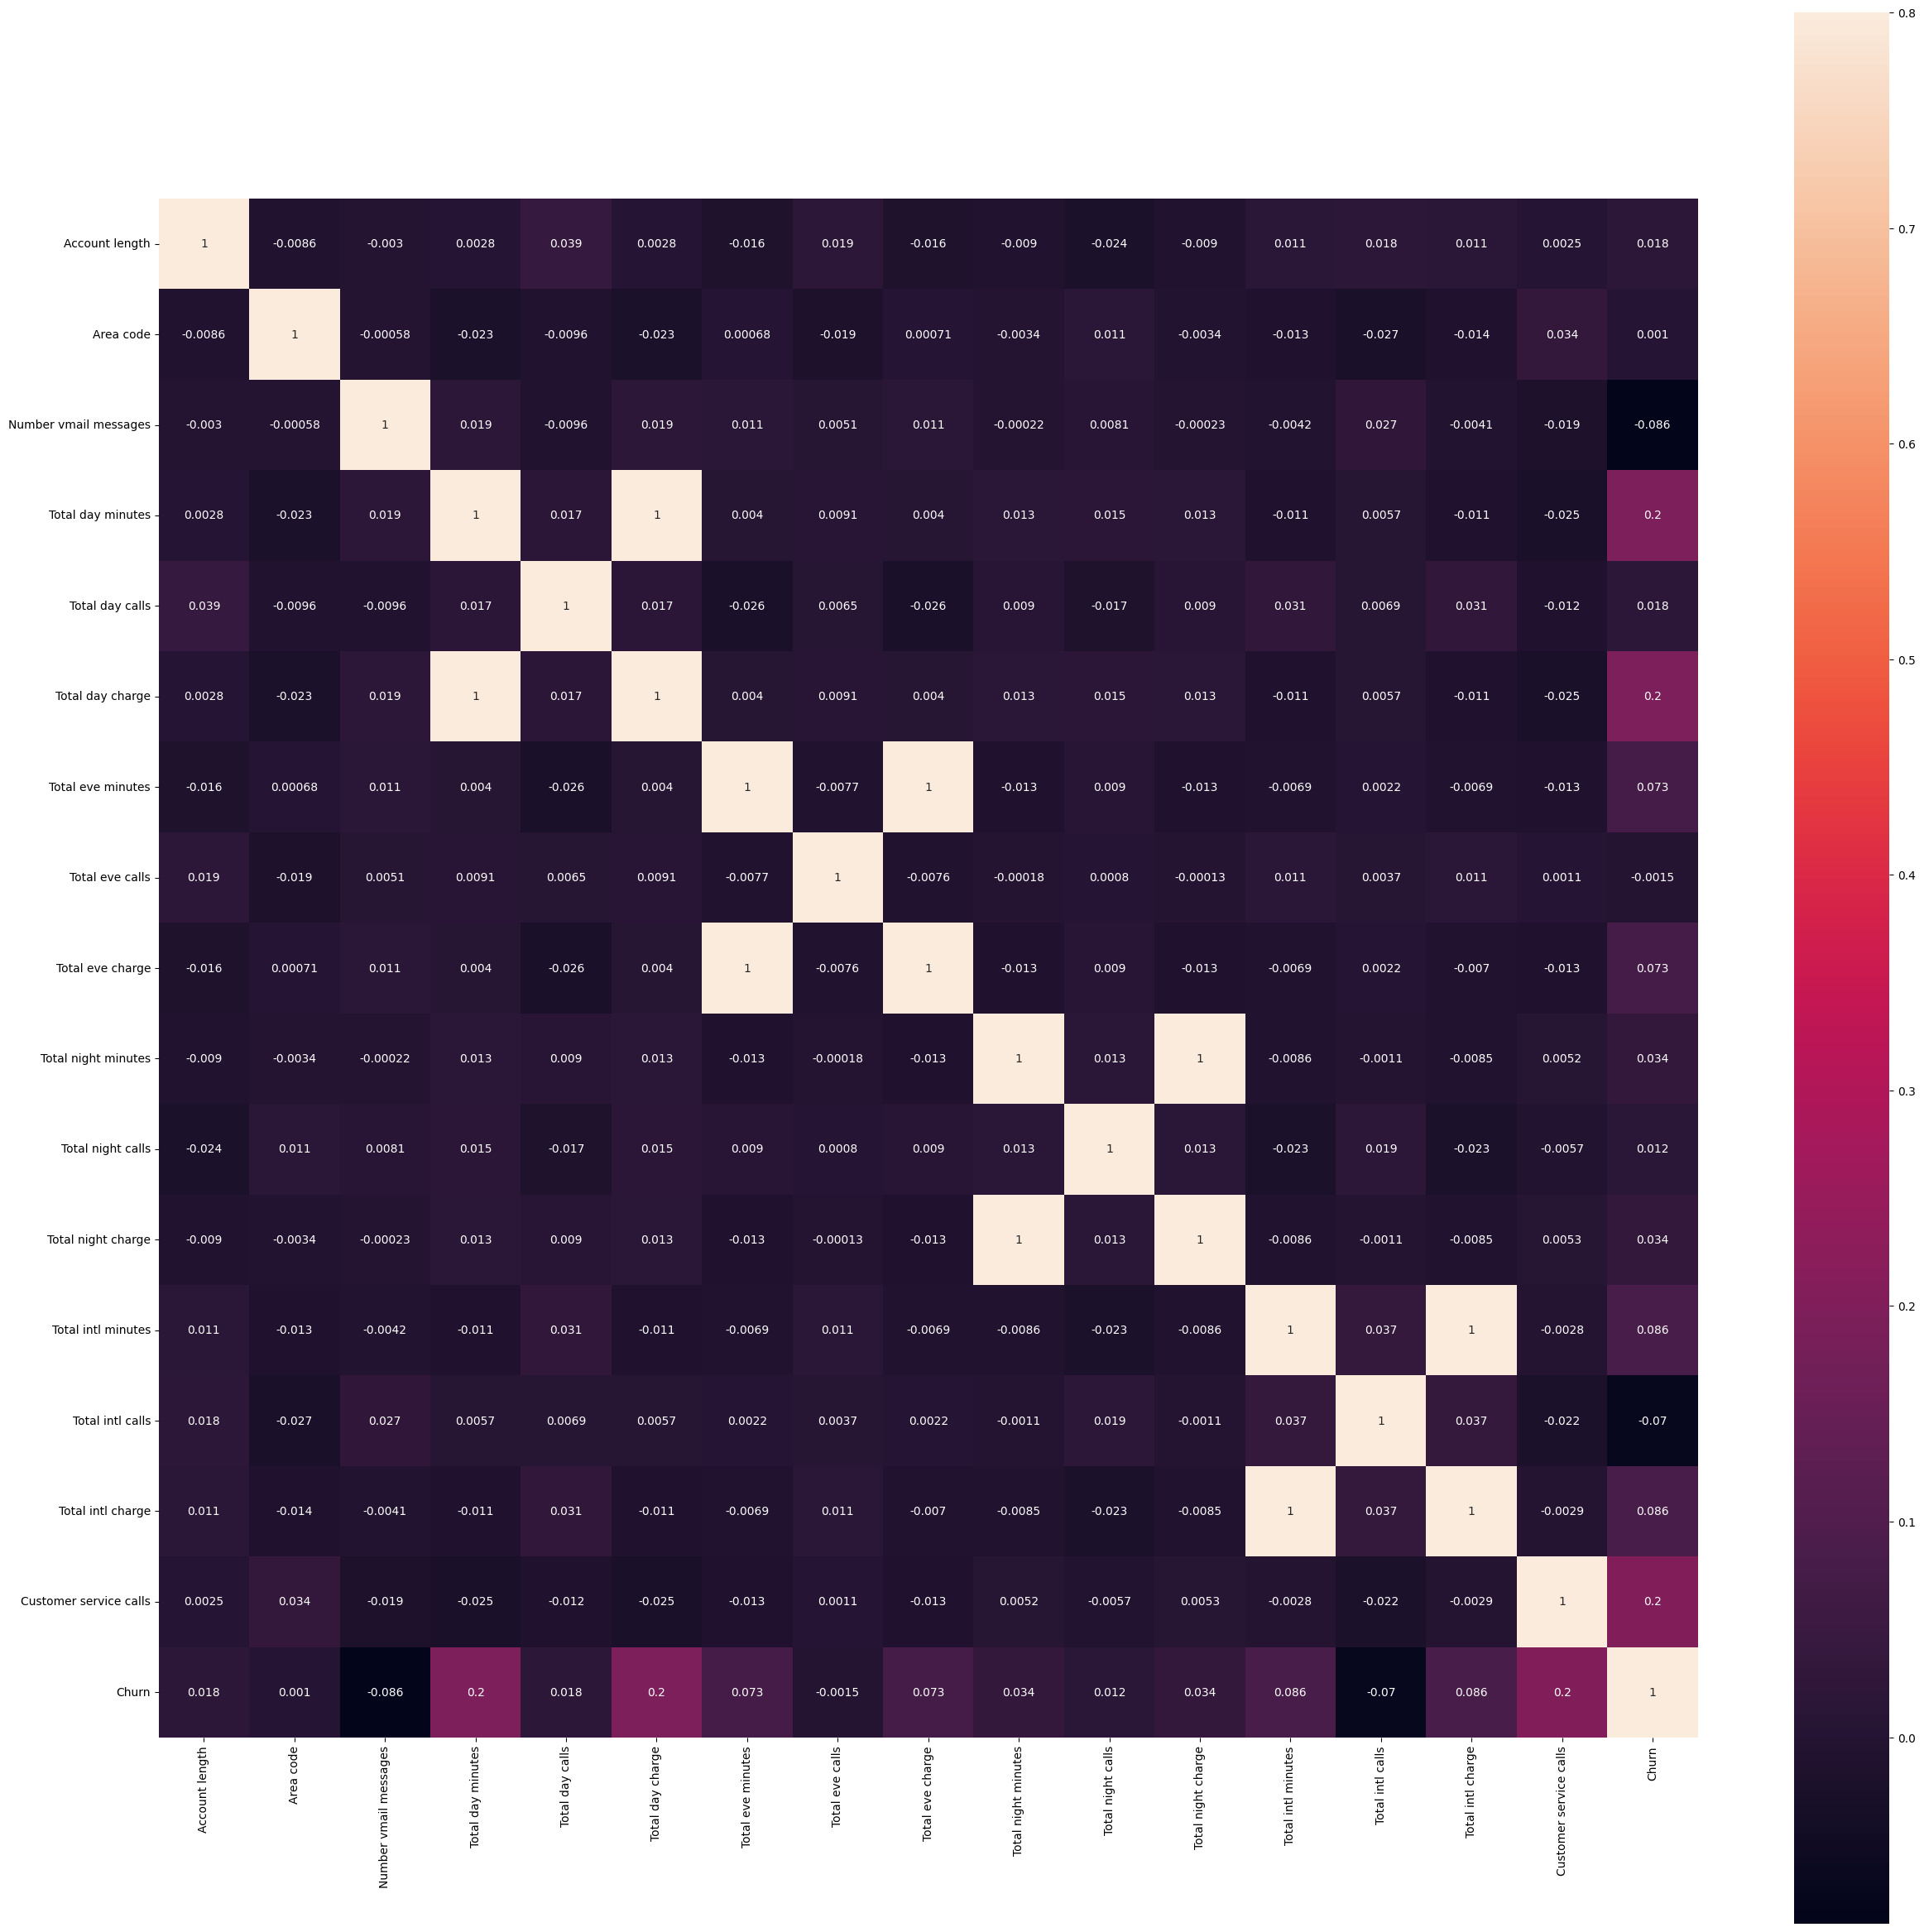

In [92]:
corrmat = df.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corrmat, vmax=.8, square=True,annot=True);

In [93]:
# #Correlated Columns
# Total eve charge - Total eve minutes
# Total night charge - Total night minutes
# Total intl charge - Total intl minutes


SyntaxError: invalid syntax (2391922297.py, line 2)

#### Preprocessing based on EDA

In [94]:
def preprocessing(df):
    #Dropping Correlated Columns and also Irrevelent column-State
    df.drop(['Total eve minutes','Total night minutes','Total intl minutes','State'],axis=1,inplace=True)
    #Converting area code as Object
    df['Area code'] = df['Area code'].astype(str)
    #Number vmail messages - 72% zeroes - dropping
    df.drop('Number vmail messages',axis=1,inplace=True)

In [95]:
#Making copy of original dataset
copy_df = df.copy()
#Calling the preprocessing function
preprocessing(copy_df)

In [96]:
copy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Account length          2666 non-null   int64  
 1   Area code               2666 non-null   object 
 2   International plan      2666 non-null   object 
 3   Voice mail plan         2666 non-null   object 
 4   Total day minutes       2666 non-null   float64
 5   Total day calls         2666 non-null   int64  
 6   Total day charge        2666 non-null   float64
 7   Total eve calls         2666 non-null   int64  
 8   Total eve charge        2666 non-null   float64
 9   Total night calls       2666 non-null   int64  
 10  Total night charge      2666 non-null   float64
 11  Total intl calls        2666 non-null   int64  
 12  Total intl charge       2666 non-null   float64
 13  Customer service calls  2666 non-null   int64  
 14  Churn                   2666 non-null   

### Column Transfromer

In [97]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [98]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [99]:
X = copy_df.drop('Churn',axis=1)
y = copy_df['Churn']

In [100]:
#Categorical Features
categoric_features = X.select_dtypes('object').columns
categoric_pipeline = make_pipeline(OneHotEncoder())

In [101]:
#Numeric Features
numeric_features = X.select_dtypes(exclude='object').columns
numeric_pipeline = make_pipeline(StandardScaler())

In [102]:
#Column Transformer

transformer = make_column_transformer((numeric_pipeline, numeric_features),
                                       (categoric_pipeline, categoric_features))

#### Transformimg X-Feature dataset

In [103]:
X = transformer.fit_transform(X)

## HyperParameter Tuning using GridSearchCV

In [113]:
from sklearn.model_selection import GridSearchCV

### OOB Error Rate

In [105]:
rf.set_params(warm_start=True, 
                  oob_score=True)

min_estimators = 100
max_estimators = 1000

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    rf.set_params(n_estimators=i)
    rf.fit(X, y)

    oob_error = 1 - rf.oob_score_
    error_rate[i] = oob_error

D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:455: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


In [106]:
# Convert dictionary to a pandas series for easy plotting 
oob_series = pd.Series(error_rate)

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

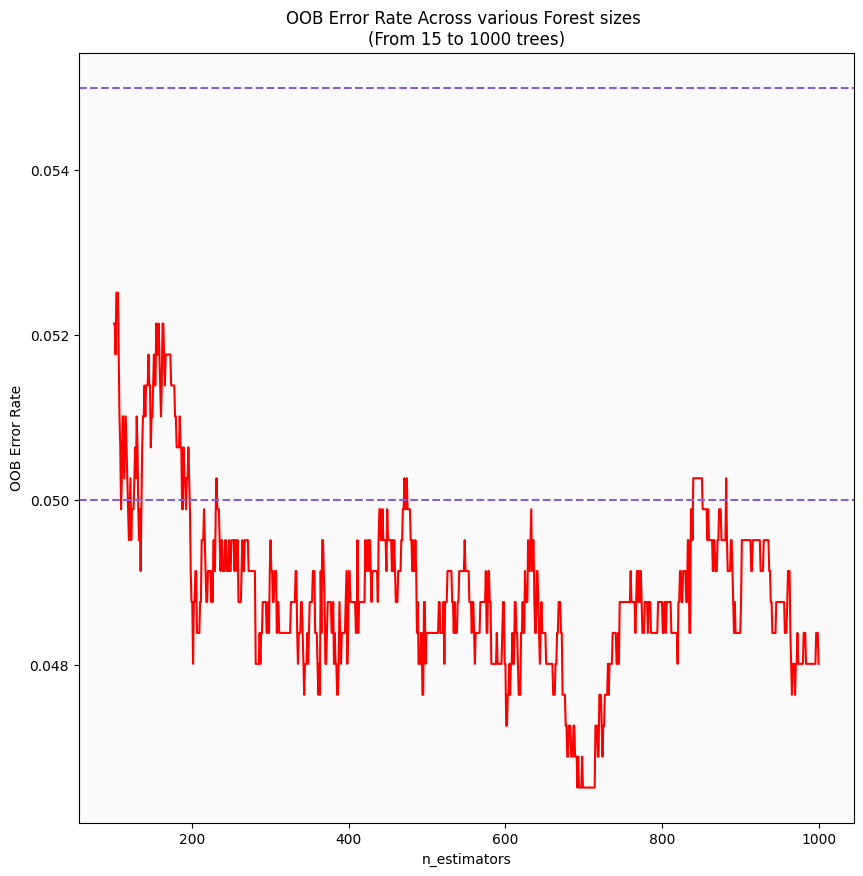

In [107]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
plt.axhline(0.055, color='#875FDB',linestyle='--')
plt.axhline(0.05, color='#875FDB',linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

In [112]:
print('OOB Error rate for 400 trees is: {0:.5f}'.format(oob_series[660]))

OOB Error rate for 400 trees is: 0.04801


In [138]:
# From OOB Error rate, I choose n_estimators=660

In [117]:
#GridSearchCV
import numpy as np
np.random.seed(42)


param_dist = {
    'max_depth': [2,3,4,8,12,16,30,50,70,100,200]
    
              }

cv_rf = GridSearchCV(rf, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)

cv_rf.fit(X, y)
print('Best Parameters using grid search: \n', cv_rf.best_params_)

Best Parameters using grid search: 
 {'max_depth': 30}


### Setting the best parameters 

In [118]:
rf.set_params(n_estimators=660,
                  max_depth=30,
                  bootstrap = True,
                  warm_start=False, 
                  oob_score=False)

RandomForestClassifier(max_depth=30, n_estimators=660)

In [119]:
rf.fit(X,y)

RandomForestClassifier(max_depth=30, n_estimators=660)

### Predictions on Test Data

In [120]:
test_df = pd.read_csv('churn-bigml-20.csv')

In [121]:
X_test

array([[ 0.34712707,  0.0640358 , -0.19316696, ...,  0.        ,
         1.        ,  0.        ],
       [-0.92773053, -0.93475624,  1.76939763, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.42585272,  2.73950042, -1.66509041, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.05031299,  0.23350594,  0.83717945, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.37681974, -0.20098663,  0.64092299, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.98973205,  0.59227781,  0.19934595, ...,  1.        ,
         1.        ,  0.        ]])

In [122]:
copy_testdf = test_df.copy()
preprocessing(copy_testdf)

#### Seperating Feature and Target Columns

In [123]:
X_test = copy_testdf.drop('Churn',axis=1)
y_test = copy_testdf['Churn']

In [124]:
#Categorical Features
categoric_features = X_test.select_dtypes('object').columns


#Numeric Features
numeric_features = X_test.select_dtypes(exclude='object').columns

#### Transforming Test Data

In [125]:
X_test = transformer.fit_transform(X_test)

In [126]:
X_test

array([[ 0.34712707,  0.0640358 , -0.19316696, ...,  0.        ,
         1.        ,  0.        ],
       [-0.92773053, -0.93475624,  1.76939763, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.42585272,  2.73950042, -1.66509041, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.05031299,  0.23350594,  0.83717945, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.37681974, -0.20098663,  0.64092299, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.98973205,  0.59227781,  0.19934595, ...,  1.        ,
         1.        ,  0.        ]])

In [127]:
predictions = rf.predict(X_test)

### Evaluation

In [128]:
from sklearn.metrics import classification_report

#### Confusion Matrix

In [130]:
from sklearn.metrics import confusion_matrix
print (confusion_matrix(y_test, predictions))

[[569   3]
 [ 30  65]]


In [131]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

       False       0.95      0.99      0.97       572
        True       0.96      0.68      0.80        95

    accuracy                           0.95       667
   macro avg       0.95      0.84      0.88       667
weighted avg       0.95      0.95      0.95       667



### Accuracy 

In [132]:
accuracy_rf = rf.score(X_test,y_test)

print("Here is our mean accuracy on the test set:\n {0:.3f}"\
      .format(accuracy_rf))

Here is our mean accuracy on the test set:
 0.951


### Area Under the Curve

In [133]:
from sklearn.metrics import roc_curve, auc

In [134]:
# We grab the second array from the output which corresponds to
# to the predicted probabilites of positive classes 
# Ordered wrt fit.classes_ in our case [0, 1] where 1 is our positive class
predictions_prob = rf.predict_proba(X_test)[:, 1]

fpr2, tpr2, _ = roc_curve(y_test,
                          predictions_prob,
                          pos_label = 1)

In [135]:
auc_rf = auc(fpr2, tpr2)

In [136]:
def plot_roc_curve(fpr, tpr, auc, estimator, xlim=None, ylim=None):
    """
    Purpose
    ----------
    Function creates ROC Curve for respective model given selected parameters.
    Optional x and y limits to zoom into graph

    Parameters
    ----------
    * fpr: Array returned from sklearn.metrics.roc_curve for increasing
            false positive rates
    * tpr: Array returned from sklearn.metrics.roc_curve for increasing
            true positive rates
    * auc: Float returned from sklearn.metrics.auc (Area under Curve)
    * estimator: String represenation of appropriate model, can only contain the
    following: ['knn', 'rf', 'nn']
    * xlim: Set upper and lower x-limits
    * ylim: Set upper and lower y-limits
    """
    my_estimators = {'knn': ['Kth Nearest Neighbor', 'deeppink'],
              'rf': ['Random Forest', 'red'],
              'nn': ['Neural Network', 'purple']}

    try:
        plot_title = my_estimators[estimator][0]
        color_value = my_estimators[estimator][1]
    except KeyError as e:
        print("'{0}' does not correspond with the appropriate key inside the estimators dictionary. \
\nPlease refer to function to check `my_estimators` dictionary.".format(estimator))
        raise

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_facecolor('#fafafa')

    plt.plot(fpr, tpr,
             color=color_value,
             linewidth=1)
    plt.title('ROC Curve For {0} (AUC = {1: 0.3f})'\
              .format(plot_title, auc))

    plt.plot([0, 1], [0, 1], 'k--', lw=2) # Add Diagonal line
    plt.plot([0, 0], [1, 0], 'k--', lw=2, color = 'black')
    plt.plot([1, 0], [1, 1], 'k--', lw=2, color = 'black')
    if xlim is not None:
        plt.xlim(*xlim)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    plt.close()

C:\Users\Onkar\AppData\Local\Temp\ipykernel_14656\2153116955.py:42: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 0], [1, 0], 'k--', lw=2, color = 'black')
C:\Users\Onkar\AppData\Local\Temp\ipykernel_14656\2153116955.py:43: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([1, 0], [1, 1], 'k--', lw=2, color = 'black')


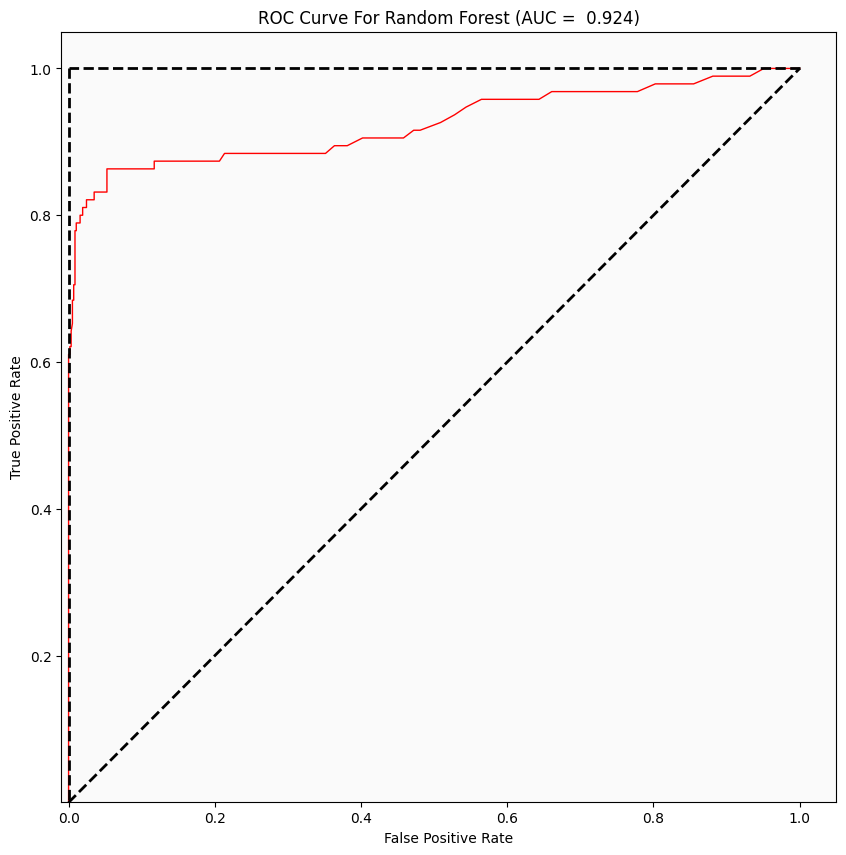

In [137]:
plot_roc_curve(fpr2, tpr2, auc_rf, 'rf',
               xlim=(-0.01, 1.05), 
               ylim=(0.001, 1.05))